- 영국의 통계학자 갈톤(Galton)
- 부모와 자식간의 키 : 
   - 부모의 키가 크다고 해서 자식의 키가 크는 것은 아니다.
   - 부모의 키가 작다고 해서 자식의 키가 작은 것은 아니다.
   - 즉, 사람의 키는 평균 키로 회귀하려는 경향을 가진다는 자연의 법칙이 있다.
- 회귀분석은 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법이다.
- 회귀는 여러 개의 독립변수와 한개의 종속변수 간의 상관관계를 모델링하는 기법이다.
- 회귀을 일차함수로 표현
   y = W*X + b  

   W : 기울기, 가중치  
   b : 절편, 바이어스  



[0. 0. 0.]


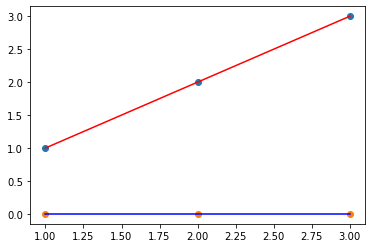

In [1]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

x = np.array([1,2,3])
y = np.array([1,2,3])

w = 0
b = 0

y_hat = np.zeros(3)

for i in range(len(x)):
    y_hat[i] = w*x[i] + b;
print(y_hat)

plt.plot(x,y, 'o' )
plt.plot(x,y, 'r-' )

plt.plot(x,y_hat, 'o' )
plt.plot(x,y_hat, 'b-' )


[-1.         -0.95959596 -0.91919192 -0.87878788 -0.83838384 -0.7979798
 -0.75757576 -0.71717172 -0.67676768 -0.63636364 -0.5959596  -0.55555556
 -0.51515152 -0.47474747 -0.43434343 -0.39393939 -0.35353535 -0.31313131
 -0.27272727 -0.23232323 -0.19191919 -0.15151515 -0.11111111 -0.07070707
 -0.03030303  0.01010101  0.05050505  0.09090909  0.13131313  0.17171717
  0.21212121  0.25252525  0.29292929  0.33333333  0.37373737  0.41414141
  0.45454545  0.49494949  0.53535354  0.57575758  0.61616162  0.65656566
  0.6969697   0.73737374  0.77777778  0.81818182  0.85858586  0.8989899
  0.93939394  0.97979798  1.02020202  1.06060606  1.1010101   1.14141414
  1.18181818  1.22222222  1.26262626  1.3030303   1.34343434  1.38383838
  1.42424242  1.46464646  1.50505051  1.54545455  1.58585859  1.62626263
  1.66666667  1.70707071  1.74747475  1.78787879  1.82828283  1.86868687
  1.90909091  1.94949495  1.98989899  2.03030303  2.07070707  2.11111111
  2.15151515  2.19191919  2.23232323  2.27272727  2.3

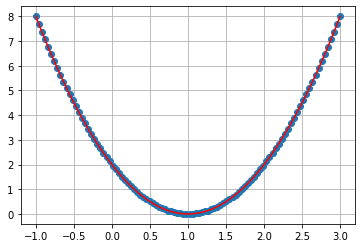

In [2]:
import numpy as np   # numeriacal computing
import matplotlib.pyplot as plt  # plotting core

w = np.linspace(-1,3,100)
print(w)
print(len(w))
b = 0

j = np.zeros(100)

for i in range(len(w)):
    y_hat = w[i]*2 + b;
    j[i] = 0.5 * (y_hat - 2)**2

plt.plot(w,j, 'o' )
plt.plot(w,j, 'r-' )

plt.grid(True)
plt.show()

1. x = [1, 2, 3]  
   y = [1, 2, 3]  

2. 선형회귀  
   y' = Wx+b  
  
3. w=0, b=0 초기화  
   y'= 0X+0  
   y'= [0, 0, 0]  

4. 평가(MSE)  1/2(y'-y)^2  
   y'-y=([1,4,9]/3)/2 = 2.33  
    
5. w, b  
   손실함수 : 1/2(y'-y)^2  

   w = w - 기울기  
       = w + x(y-y')  
   b = b - 기울기  
      = b + (y-y')  

  

### 경사하강법 예제

In [3]:
import numpy as np
import matplotlib.pyplot as plt

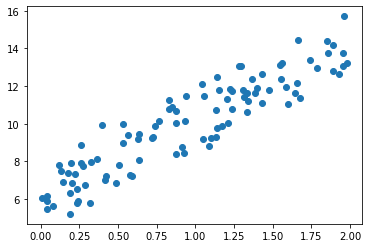

In [15]:
# y = 4X + 6

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X,y)

In [57]:
# 참고
a = np.array([[2,3,1],[1,2,3]])
len(a)

2

In [49]:

def get_weight_update(w, b, X, y, learning_rate=0.01):
    N = len(y)  # 100
    
    # w_updte, b_update 를 각각, w, b의 shape와 동일한 크기를 가진 0값으로 초기화
    w_update = np.zeros_like(w)  # [[0]]
    b_update = np.zeros_like(b)  #[[0]]
    
    print(X.shape , w.shape)
    
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w.T) + b  # hypersis : y= X*w + b
    diff = y - y_pred
    
    b_factors = np.ones((N, 1))
    
    # w, b을 업데이트할 ,w_update와 b_update 계산
    # w = w - learning_rate * 기울기(x(y-y'))
    w_update = -(2/N) * learning_rate * (np.dot(X.T, diff)) 
    b_update = -(2/N) * learning_rate * (np.dot(b_factors.T, diff))
    
    return w_update, b_update    
    

In [50]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w와 b를 업데이트 적용
def gradient_descent_steps(X, y, iters=10000):
    
    # w, b초기값을 모두 0으로 저장    
    w = np.zeros((1,1)) # w = [[0]]
    b = np.zeros((1,1)) # b = [[0]]
    
    
    for ind in range(iters):   # X : (100,1),   y:(100, 1)
        w_update, b_update = get_weight_update(w, b, X, y, learning_rate=0.01)
        w = w - w_update
        b = b - b_update
    
    return w, b

In [53]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [54]:
w, b = gradient_descent_steps(X, y, iters=1000)
print("w:{0: .4f} b:[1: .4f]".format(w[0,0], b[0,0]))
y_pred = w[0,0] * X + b
print('Gradient Descent Total Cost : {0: .4f}'.format(get_cost(y, y_pred)))

(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1) (1, 1)
(100, 1)

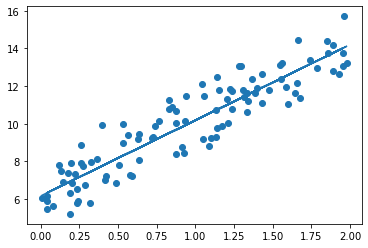

In [52]:
plt.scatter(X, y)
plt.plot(X, y_pred)

### (미니배치) 확률적 경사 하강법(stochastic_grandient_descent_steps)

- 경사하강법은 모든 학습 데이터에 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다.

- (미니배치)확률적 경사 하강법은 일부 데이터만 이용해 w가 업데이트되는 값을 계산하는 경사 하강법이다.

In [61]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    b = np.zeros((1,1))
    w= np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w_update, b_update = get_weight_update(w, b, sample_X, sample_y, learning_rate=0.01)
        w = w - w_update
        b = b - b_update
    
    return w, b

In [62]:
w, b = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w:",round(w[0,0],3),"b:",round(b[0,0],3))
y_pred = w[0,0] * X + b
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1

(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1, 1)
(10, 1) (1

### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [64]:
# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


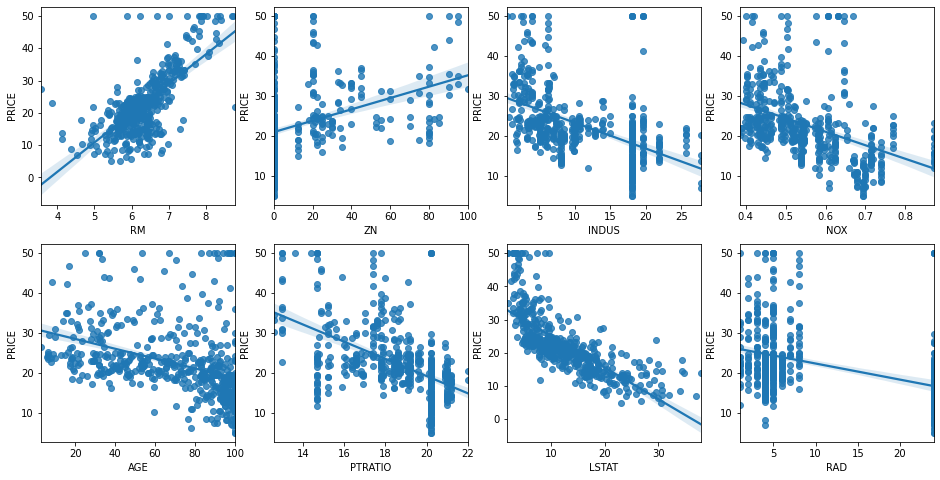

In [65]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [67]:
print('절편 값:',lr.intercept_)
# 독립변수가 13개 이므로 회귀계수(가중치)도 13개 이다.
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164315
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [68]:
print(X_data.shape)

(506, 13)


In [70]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [69]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 
